In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import DataReader

from datetime import datetime

In [4]:
# ハイテク企業の株価を扱う
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# 直近1年間のデータ
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# それぞれの企業ごとにYahooからデータを取得する
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,195.181230,191.335436,193.210159,193.303333,3.148162e+07,192.177152
std,22.739140,22.770669,22.692281,22.742918,1.352645e+07,23.226207
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.967499,173.747501,174.872501,174.832497,2.178268e+07,173.452965
50%,199.055000,193.930000,196.434998,197.000000,2.784870e+07,195.877899
75%,209.260006,205.594994,207.717499,207.912502,3.695615e+07,206.560455
max,249.750000,246.720001,248.970001,249.050003,9.574460e+07,249.050003


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-10-29 to 2019-10-29
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


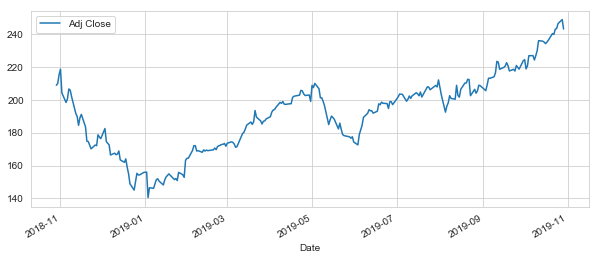

In [9]:
# 終値の時系列をプロット
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

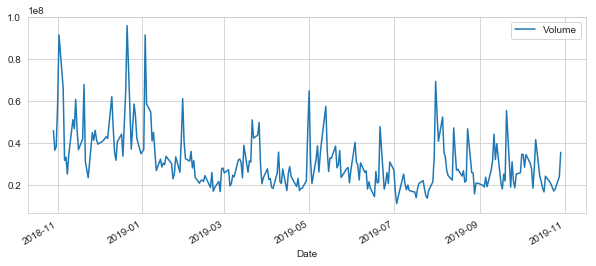

In [10]:
# 出来高(1日に取引が成立した株の数)をプロット
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [12]:
# 間隔ごとに移動平均を描く
ma_day = [10,20,50]

for ma in ma_day:
    column_name = f"MA {ma}"
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

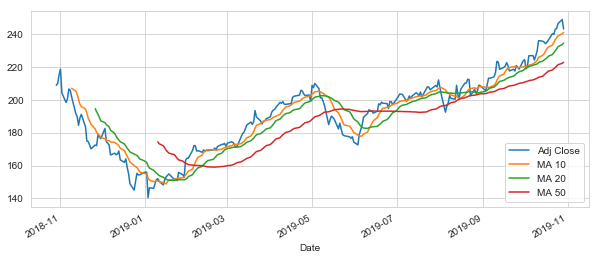

In [14]:
AAPL[['Adj Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(10,4))

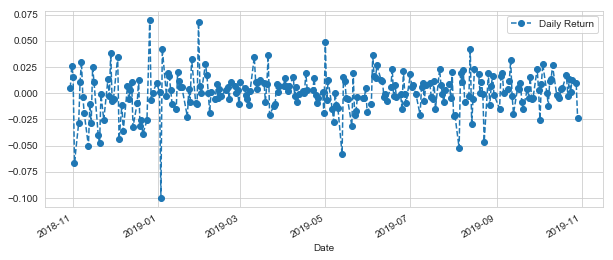

In [15]:
# pct_changeを使うと変化の割合を計算できる
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# 日毎の変化率をプロット
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


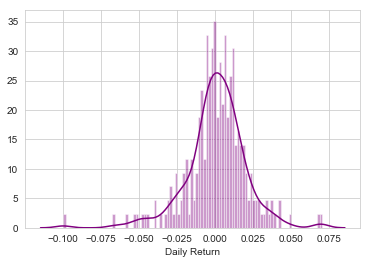

In [18]:
# 前日比のヒストグラム
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [23]:
# 4社の株価をDataFrameにまとめる
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [24]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-10-29,208.996857,1538.880005,1020.080017,102.243370
2018-10-30,210.040649,1530.420044,1036.209961,102.125237
2018-10-31,215.515686,1598.010010,1076.770020,105.157578
2018-11-01,218.824341,1665.530029,1070.000000,104.281342
2018-11-02,204.309570,1665.530029,1057.790039,104.517632


In [25]:
# 終値の日毎の変化を計算する
tech_rets = closing_df.pct_change()

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


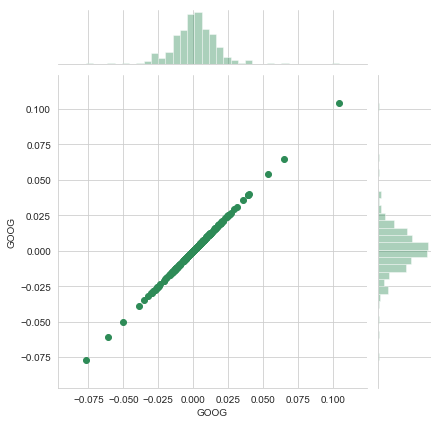

In [28]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


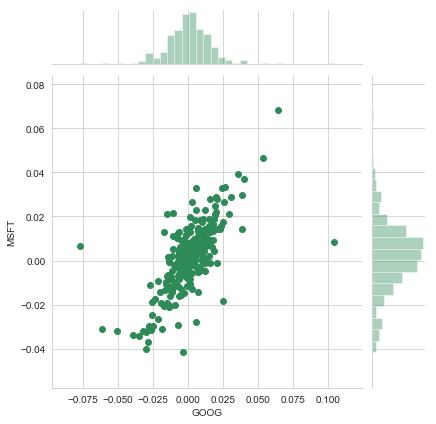

In [29]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

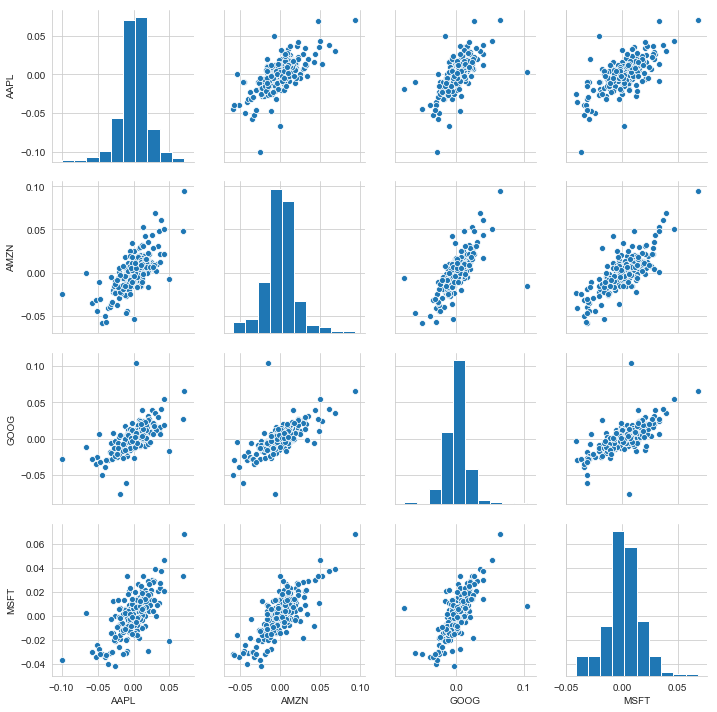

In [30]:
# 4社の比較
sns.pairplot(tech_rets.dropna())

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


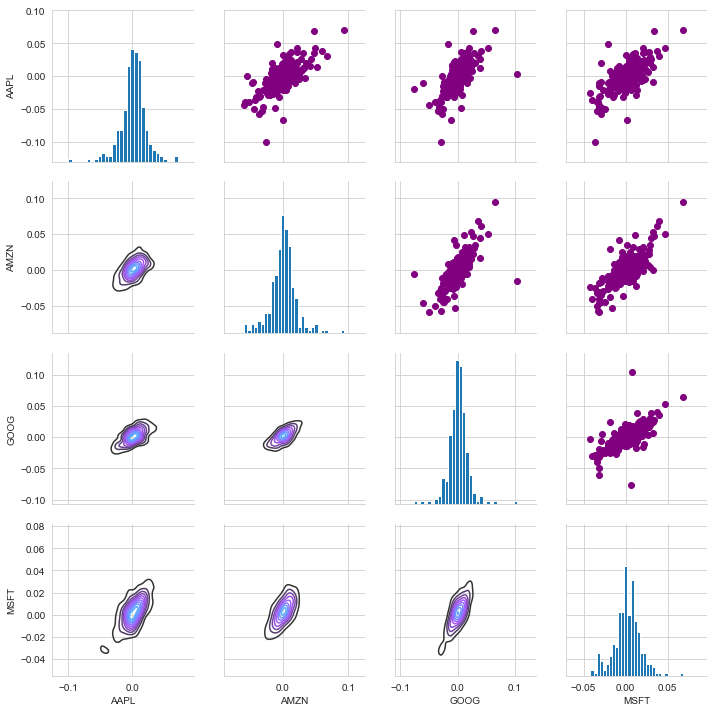

In [31]:
# PairGrifを作成
returns_fig = sns.PairGrid(tech_rets.dropna())

# 右側に描くグラフを散布図に指定
returns_fig.map_upper(plt.scatter,color='purple')

# 左側に描くグラフをKDEプロットに指定
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# 対角線上に描くグラフをヒストグラムに指定
returns_fig.map_diag(plt.hist,bins=30)

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


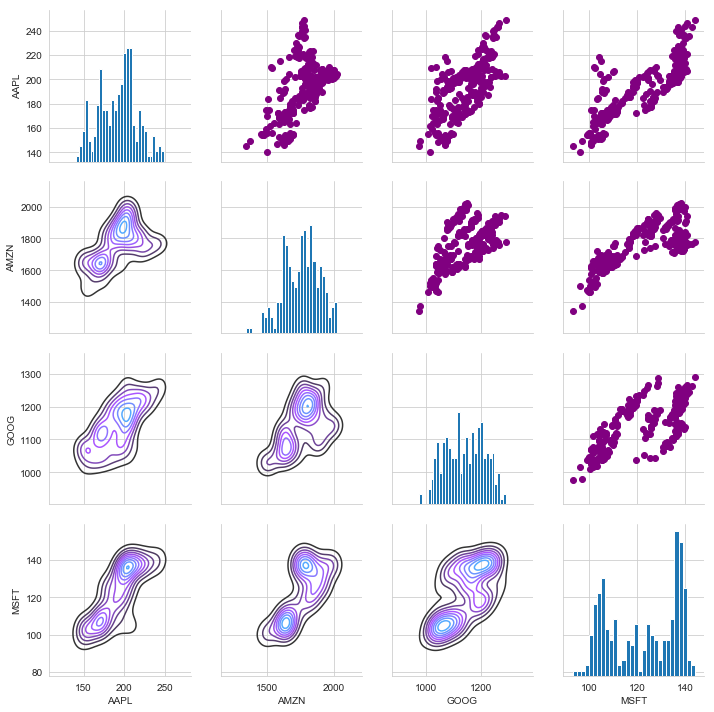

In [32]:
# 終値についても同様に
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

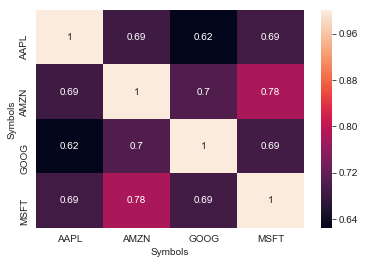

In [33]:
# 相関係数の数値はheatmapで使える
sns.heatmap(tech_rets.corr(),annot=True)

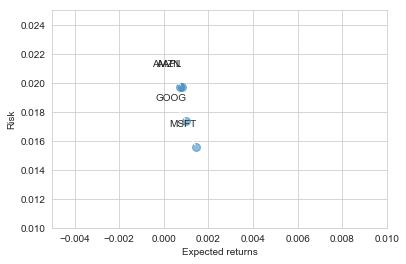

In [36]:
# リスクの基本はその株価の変動幅
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

plt.ylim([0.01,0.025])
plt.xlim([-0.005,0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (0,20),
        textcoords = 'offset points', ha = 'right',
        arrowprops = dict(arrowstyle='-',connectionstyle='arc3'))

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


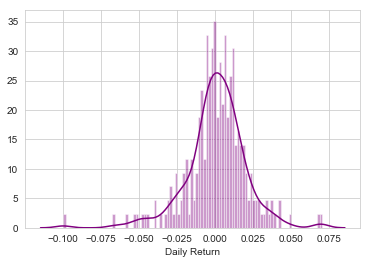

In [37]:
# ある一定の確率で資産がどれくらい減ってしまうかを見積もる
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [38]:
# 5パーセンタイルの位置にある変動率は?
rets['AAPL'].quantile(0.05)

-0.031230743375149306

In [39]:
# Googleの株価を使ってモンテ・カルロ方の基本的な使い方を学ぶ
# 1年を基準にする
days = 365

# 1日分の差分
dt = 1/days

# 日々の変動の平均を計算
mu = rets.mean()['GOOG']

# ボラティリティ(volatility: 株価の変動の振れ幅)を変動の標準偏差で計算
sigma = rets.std()['GOOG']

In [40]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' この関数は、シミュレーションの結果の価格リストを返します。'''
    
    # 戻り値となる価格のリストを返します。
    price = np.zeros(days)
    price[0] = start_price
    # Shock と Driftです。
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # 指定された日数のところまで、計算します。
    for x in range(1,days):
        #  shockを計算します
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Driftを計算します。
        drift[x] = mu * dt
        # これらを使って価格を計算します。
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [41]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-29,1097.040039,995.830017,1082.469971,1020.080017,3880700,1020.080017
2018-10-30,1037.489990,1000.750000,1008.460022,1036.209961,3212700,1036.209961
2018-10-31,1091.939941,1057.000000,1059.810059,1076.770020,2529800,1076.770020
2018-11-01,1083.974976,1062.459961,1075.800049,1070.000000,1482000,1070.000000
2018-11-02,1082.974976,1054.609985,1073.729980,1057.790039,1839000,1057.790039


In [42]:
GOOG.iloc[0,5]

1020.0800170898438